## DECISION TREE (CATEGORICAL) 

In [54]:
dataset_categorical =mydata_cat
dataset_continuous = mydata_con

dataset_categorical['Reason for absence'] = dataset_categorical['Reason for absence'].astype('category').cat.codes
dataset_categorical['Month of absence'] = dataset_categorical['Month of absence'].astype('category').cat.codes
dataset_categorical['Day of the week'] = dataset_categorical['Day of the week'].astype('category').cat.codes
dataset_categorical['Seasons'] = dataset_categorical['Seasons'].astype('category').cat.codes
dataset_categorical['Disciplinary failure'] = dataset_categorical['Disciplinary failure'].astype('category').cat.codes
dataset_categorical['Education'] = dataset_categorical['Education'].astype('category').cat.codes
dataset_categorical['Social drinker'] = dataset_categorical['Social drinker'].astype('category').cat.codes
dataset_categorical['Social smoker'] = dataset_categorical['Social smoker'].astype('category').cat.codes
dataset_categorical['Pet'] = dataset_categorical['Pet'].astype('category').cat.codes
dataset_categorical['followUp_req'] = dataset_categorical['followUp_req'].astype('category').cat.codes
dataset_categorical['Absenteeism categories'] = dataset_categorical['Absenteeism categories'].astype('category').cat.codes

In [55]:
target = dataset_categorical['Absenteeism categories']
categorical = dataset_categorical.drop(['Absenteeism categories'], axis=1)

#categorical = pd.get_dummies(categorical, ['Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker','Pet','followUp_req'])

y_check = mydata_test['Absenteeism categories']
categorical_check = mydata_test.drop(['Absenteeism categories','Absenteeism time in hours'], axis=1)

In [56]:
numbers = LabelEncoder()
y = numbers.fit_transform(target.astype('str'))
y_check = numbers.fit_transform(y_check.astype('str'))
X_train,X_test,y_train,y_test = train_test_split(categorical, y, test_size=.10, random_state=1)

count_original =target.value_counts()
print("count in original dataset ", count_original )

clf = DecisionTreeClassifier(criterion='gini', max_depth=7)

clf = clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

acc = accuracy_score(y_test,y_predict)*100

print("Accuracy of decision tree with categorical target variable is [validation set]:",acc)
y_predict_test = clf.predict(categorical_check)

acc_test = accuracy_score(y_check,y_predict_test)*100

print('Decision tree accuracy of test set: ',acc_test)

count in original dataset  5    184
2    138
3    100
1     84
4     64
6     57
0     37
Name: Absenteeism categories, dtype: int64
Accuracy of decision tree with categorical target variable is [validation set]: 47.76119402985074
Decision tree accuracy of test set:  43.24324324324324


In [57]:
print("Classification report : ")
print(classification_report(y_test, y_predict))

Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.23      0.27      0.25        11
           2       0.56      0.56      0.56        16
           3       0.25      0.22      0.24         9
           4       0.33      0.17      0.22         6
           5       0.60      0.79      0.68        19
           6       0.00      0.00      0.00         4

   micro avg       0.48      0.48      0.48        67
   macro avg       0.43      0.43      0.42        67
weighted avg       0.44      0.48      0.45        67



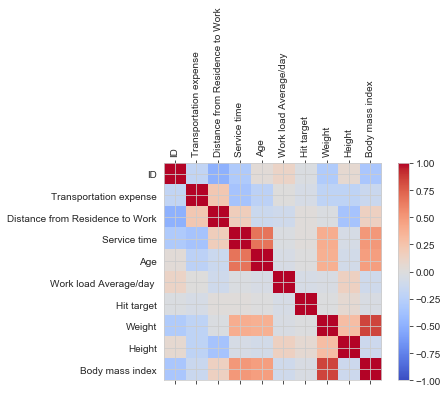

In [58]:
# Feature selection through correlation

col = ['ID','Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target','Weight','Height','Body mass index']

data_cor = dataset_categorical.loc[:,col]
corr = data_cor.corr()


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin= -1, vmax=1)
fig.colorbar(cax)

# arange is a tool for creating numeric sequences
tick = np.arange(0,len(data_cor.columns),1)

ax.set_xticks(tick)
ax.set_yticks(tick)

plt.xticks(rotation=90)

ax.set_xticklabels(col)
ax.set_yticklabels(col)

plt.show()

In [59]:
categorical_features = dataset_categorical.drop(['Weight','Age','Absenteeism categories'], axis=1)

#categorical_features = pd.get_dummies(categorical_features, ['Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker','Pet','followUp_req'])

X_train,X_test,y_train,y_test = train_test_split(categorical_features, y, test_size=.10, random_state=1)

clf_sel = DecisionTreeClassifier(criterion='gini', max_depth=7)

clf_sel = clf_sel.fit(X_train,y_train)

y_predict_sel = clf_sel.predict(X_test)

acc_sel = accuracy_score(y_test,y_predict_sel)*100

print("Accuracy of decision tree with categorical target variable after features selection is [validation set]:",acc_sel)

categorical_check_sel = categorical_check.drop(['Weight','Age'], axis=1)
y_predict_test_sel = clf_sel.predict(categorical_check_sel)

acc_test_sel = accuracy_score(y_check,y_predict_test_sel)*100

print('Decision tree accuracy of test set after features selection: ',acc_test_sel)


Accuracy of decision tree with categorical target variable after features selection is [validation set]: 38.80597014925373
Decision tree accuracy of test set after features selection:  25.675675675675674


In [60]:
# Categorical model after scaling

#categorical_scaled = StandardScaler().fit_transform(categorical_features)
categorical_scaled = scale(categorical_features)
X_train,X_test,y_train,y_test = train_test_split(categorical_scaled, y, test_size=.10, random_state=1)

clf_scaled = DecisionTreeClassifier(criterion='gini', max_depth=4)

clf_scaled = clf_scaled.fit(X_train,y_train)

y_predict_scaled = clf_scaled.predict(X_test)

acc_scaled = accuracy_score(y_test,y_predict_scaled)*100

print("Accuracy of decision tree after scaling [validation set]",acc_scaled)

categorical_check_scaled =scale(categorical_check_sel)
y_predict_test_scaled = clf_scaled.predict(categorical_check_scaled)

acc_test_scaled = accuracy_score(y_check,y_predict_test_scaled)*100

print('Decision tree accuracy of test set after features selection: ',acc_test_scaled)

Accuracy of decision tree after scaling [validation set] 49.25373134328358
Decision tree accuracy of test set after features selection:  39.189189189189186


In [61]:
# Categorical model with pca
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

categorical_pca = pca.fit_transform(categorical_features)
print('variance ratio',pca.explained_variance_ratio_.cumsum())

categorical_pca_df = pd.DataFrame(data=categorical_pca, columns=['pc1','pc2','pc3','pc4','pc5'])

X_train,X_test,y_train,y_test = train_test_split(categorical_pca_df, y, test_size=.10, random_state=1)

clf_pca = DecisionTreeClassifier(criterion='entropy', max_depth=6)

clf_pca = clf_pca.fit(X_train,y_train)

y_predict_pca = clf_pca.predict(X_test)

acc_pca = accuracy_score(y_test,y_predict_pca)*100

print("Accuracy of decision tree with PCA [validation set]: ",acc_pca)

categorical_pca_test = pca.fit_transform(categorical_check_scaled)
print('variance ratio',pca.explained_variance_ratio_.cumsum())

categorical_pca_df_test = pd.DataFrame(data=categorical_pca_test, columns=['pc11','pc12','pc13','pc14','pc15'])
y_predict_test_pca = clf_pca.predict(categorical_pca_df_test)

acc_test_pca = accuracy_score(y_check,y_predict_test_pca)*100

print('Decision tree accuracy of test set after pca: ',acc_test_pca)

variance ratio [0.65616674 0.92707473 0.96450764 0.97670906 0.98523163]
Accuracy of decision tree with PCA [validation set]:  32.83582089552239
variance ratio [0.17438687 0.33504044 0.46951233 0.56996016 0.64330887]
Decision tree accuracy of test set after pca:  4.054054054054054


In [62]:
print(" So best accuracy achieved by using decision tree for categorical target variable is after doing feature selection and scaling. Following are confusion matrix and classification report for the same.")

 So best accuracy achieved by using decision tree for categorical target variable is after doing feature selection and scaling. Following are confusion matrix and classification report for the same.


In [63]:
print("Classification report : ")
print(classification_report(y_check,y_predict_test_sel))

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.00      0.00      0.00         4
           2       0.14      0.05      0.08        19
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4
           5       0.41      0.48      0.44        23
           6       0.09      0.50      0.15         6

   micro avg       0.26      0.26      0.26        74
   macro avg       0.23      0.23      0.20        74
weighted avg       0.26      0.26      0.24        74



In [64]:
confusion_matrix(y_check,y_predict_test_sel)

array([[ 4,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  1,  1,  0,  1,  1],
       [ 0,  0,  1,  0,  0,  2, 16],
       [ 0,  0,  1,  0,  0,  4,  6],
       [ 0,  0,  0,  0,  0,  3,  1],
       [ 0,  0,  4,  0,  0, 11,  8],
       [ 0,  0,  0,  0,  0,  3,  3]], dtype=int64)

In [170]:
print("********************* DECISION TREE ***********************")

print("\n################# Training Data Accuracies #####################\n")
print("DECISION TREE - 49.25% ")

print("\n################### Test Data Accuracies ########################\n")

print("DECISION TREE - 39.18%")
print("\n#################################################################\n")


********************* DECISION TREE ***********************

################# Training Data Accuracies #####################

DECISION TREE - 49.25% 

################### Test Data Accuracies ########################

DECISION TREE - 39.18%

#################################################################



## K neighbors Categorical target variable

In [65]:
X_train,X_test,y_train,y_test = train_test_split(categorical_scaled, y, test_size=.10, random_state=1)

from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=23).fit(X_train, y_train) 

y_predict_k = neigh.predict(X_test)

acc_knn = accuracy_score(y_test,y_predict_k)*100

print("Accuracy of KNN after scaling [validation set]",acc_knn)

y_predict_test_k = neigh.predict(categorical_check_scaled)

acc_test_knn = accuracy_score(y_check,y_predict_test_k)*100

print('KNN accuracy of test set: ',acc_test_knn)

Accuracy of KNN after scaling [validation set] 44.776119402985074
KNN accuracy of test set:  40.54054054054054


In [171]:
print("Classification report : ")
print(classification_report(y_check,y_predict_test_k))

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.00      0.00      0.00         4
           2       0.52      0.58      0.55        19
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4
           5       0.39      0.61      0.47        23
           6       0.33      0.17      0.22         6

   micro avg       0.41      0.41      0.41        74
   macro avg       0.32      0.28      0.28        74
weighted avg       0.38      0.41      0.38        74



In [172]:
print("********************* knn  ***********************")

print("\n################# Training Data Accuracies #####################\n")
print("KNN - 44.77% ")
print("\n################### Test Data Accuracies ########################\n")
print("KNN - 40.54%")
print("\n#################################################################\n")


********************* knn  ***********************

################# Training Data Accuracies #####################

KNN - 44.77% 

################### Test Data Accuracies ########################

KNN - 40.54%

#################################################################



## RANDOM FOREST 

In [38]:
#read the dataset
#mydata_cat = pd.read_csv('cleanDataset_categoricalTarget.csv')

### USER DEFINED FUNCTIONS

In [113]:
random_state_split = 121 
#function to split data
def split_data(X,Y):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state = random_state_split)
    return(x_train,x_test,y_train,y_test)

In [114]:
# function for modelling
def model_fit(x,y,randomforest):
    model_rf = randomforest.fit(x,y)
    return model_rf

In [115]:
# function for model evaluation
def model_eval(fit,x,y):
    # predict on test data
    y_pre = fit.predict(x)

    # evaluate the model
    acc = accuracy_score(y_pre,y)
    print("Accuracy of validation test set:{}%".format(round(acc*100,2)))

    #print("Confusion Matrix\n",confusion_matrix(y_pre,y))

In [116]:
#  define the response and target varaibles
features = mydata_cat.drop(['Absenteeism categories'],axis = 1)
target = mydata_cat['Absenteeism categories']
target.value_counts()

Group 5    185
Group 2    138
Group 3    101
Group 1     84
Group 4     64
Group 6     57
Group 0     37
Name: Absenteeism categories, dtype: int64

In [117]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 121)

# train model
randomforest = RandomForestClassifier(random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
Accuracy of training set:93.8%
Accuracy of validation test set:44.03%


### FEATURE SCALING

In [118]:
# standardize the varaibles
features_scaled = StandardScaler().fit_transform(features)
#split the data
x_train,x_test,y_train,y_test = train_test_split(features_scaled,target,test_size = 0.2,random_state = 121)

# train model
randomforest = RandomForestClassifier(random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

print("RESULTS OF SCALING THE DATA: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS OF SCALING THE DATA: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
Accuracy of training set:93.8%
Accuracy of validation test set:43.28%


### DATA SIZE INCREASE

In [119]:
# standardize the varaibles
features_scaled = StandardScaler().fit_transform(features)
#split the data
x_train,x_test,y_train,y_test = split_data(features_scaled,target)

# train model
randomforest = RandomForestClassifier(random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

print("RESULTS AFTER INCREASING THE DATASET SIZE: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS AFTER INCREASING THE DATASET SIZE: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
Accuracy of training set:93.51%
Accuracy of validation test set:55.88%


### PARAMETR TUNNING

In [75]:
# train model
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, n_jobs= -1,oob_score = -1,warm_start = True,
                                     criterion = 'gini',random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

print("RESULTS WITH PARAMATER TUNNING: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS WITH PARAMATER TUNNING: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=-1, random_state=100, verbose=0, warm_start=True)
Accuracy of training set:84.92%
Accuracy of validation test set:52.94%


In [120]:
# train model
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,warm_start = True,
                                    criterion = 'gini',min_samples_split=2,random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

print("RESULTS WITH PARAMATER TUNNING: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS WITH PARAMATER TUNNING: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=True)
Accuracy of training set:75.47%
Accuracy of validation test set:61.76%


### FEATURE SELECTION

In [121]:
# Get numerical feature importances
importances = list(randomforest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print(feature_importances)


[('Reason for absence', 0.19), ('Month of absence', 0.08), ('Work load Average/day ', 0.08), ('Hit target', 0.07), ('Disciplinary failure', 0.07), ('followUp_req', 0.06), ('ID', 0.05), ('Day of the week', 0.05), ('Seasons', 0.05), ('Transportation expense', 0.05), ('Weight', 0.04), ('Distance from Residence to Work', 0.03), ('Service time', 0.03), ('Age', 0.03), ('Son', 0.03), ('Height', 0.03), ('Body mass index', 0.03), ('Education', 0.01), ('Social drinker', 0.01), ('Pet', 0.01), ('Social smoker', 0.0)]


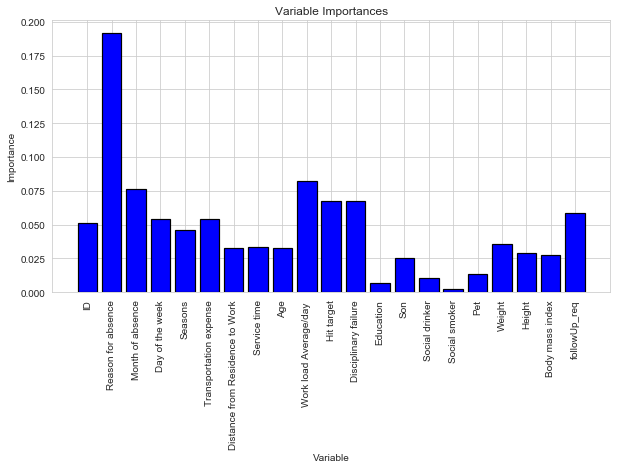

In [122]:
# List of features for later use
feature_list = list(features.columns)

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize = (10,5))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation=90)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [123]:
# Fit model using each importance as a threshold
thresholds = sorted(randomforest.feature_importances_)
print(thresholds)


for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(randomforest, threshold=thresh, prefit=True)
    
    select_X_train = selection.transform(x_train)
    #select_X_train = selection.transform(features_scaled)

    # train model
    selection_model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,oob_score = True,warm_start = True,
                                     criterion = 'gini',min_samples_split=2,random_state = 100)
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    
    predictions = [value for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    #accuracy = accuracy_score(target_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


[0.0025421956933665024, 0.0064924794468664134, 0.010790899551410573, 0.013639879965088902, 0.025425559431288203, 0.027605714516582787, 0.028877000996128426, 0.032728426909021224, 0.03300649541749743, 0.03374756297127083, 0.03530129612097821, 0.045868541078062895, 0.051233102509656396, 0.0537984009937305, 0.05416817550672572, 0.05863176517769442, 0.06772158843941567, 0.06779181366941082, 0.07662695425596507, 0.08255526437484623, 0.19144688297499246]
Thresh=0.003, n=21, Accuracy: 61.76%
Thresh=0.006, n=20, Accuracy: 61.76%
Thresh=0.011, n=19, Accuracy: 61.76%
Thresh=0.014, n=18, Accuracy: 61.76%
Thresh=0.025, n=17, Accuracy: 61.76%
Thresh=0.028, n=16, Accuracy: 61.76%
Thresh=0.029, n=15, Accuracy: 61.76%
Thresh=0.033, n=14, Accuracy: 64.71%
Thresh=0.033, n=13, Accuracy: 61.76%
Thresh=0.034, n=12, Accuracy: 61.76%
Thresh=0.035, n=11, Accuracy: 64.71%
Thresh=0.046, n=10, Accuracy: 58.82%
Thresh=0.051, n=9, Accuracy: 64.71%
Thresh=0.054, n=8, Accuracy: 61.76%
Thresh=0.054, n=7, Accuracy: 61

#### TEST VALIDATION FOR RANDOM FOREST

In [124]:
#read the test dataset
mydata_cat_test = pd.read_csv("cleanDataset_categoricalTarget_test.csv")


In [125]:
#test varaibles
#mydata_cat_test = mydata_test
features_test = mydata_cat_test.drop(['Absenteeism categories'],axis = 1)
target_test = mydata_cat_test['Absenteeism categories']

In [126]:
#scaling the data
features_scaled_test = StandardScaler().fit_transform(features_test)
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,oob_score = True,warm_start = True,
                                    criterion = 'gini',min_samples_split=2,random_state = 100)

model = randomforest.fit(features_scaled,target)

y_predict = model.predict(features_scaled_test)
print("RANDOM FOREST TEST ACCURACY:{}%".format(round(accuracy_score(y_predict,target_test)*100,2)))


RANDOM FOREST TEST ACCURACY:44.59%


In [127]:
selection = SelectFromModel(randomforest,threshold = 0.011,prefit = True)# 0.035
select_x_train = selection.transform(features_scaled)

selection_model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,oob_score = True,warm_start = True,
                                     criterion = 'gini',min_samples_split=2,random_state = 123)
sel_model = selection_model.fit(select_x_train,target)

select_x_test = selection.transform(features_scaled_test)
y_pre = sel_model.predict(select_x_test)
print("RANDOM FOREST TEST ACCURACY WITH FEATURE SELECTION:{}%".format(round(accuracy_score(y_pre,target_test)*100,2)))


RANDOM FOREST TEST ACCURACY WITH FEATURE SELECTION:47.3%


### PCA with RANDOM FOREST

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
pc = pca.fit(features_scaled)
pc.explained_variance_ratio_.cumsum()

array([0.16389609, 0.28065268, 0.39203304, 0.46813477, 0.53531333,
       0.59780715, 0.65429824, 0.70665231])

In [129]:
# pca features
new_features = pca.fit_transform(features_scaled)
# split the dataset
x_train,x_test,y_train,y_test = split_data(new_features,target)

randomforest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,oob_score = True,warm_start = True,
                                     criterion = 'gini',min_samples_split=2,random_state = 100)

model = model_fit(x_train, y_train,randomforest) 

print("RESULTS WITH PCA: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS WITH PCA: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=100, verbose=0, warm_start=True)
Accuracy of training set:85.13%
Accuracy of validation test set:50.0%


In [130]:
# PCA on test set
new_features = pca.fit_transform(features_scaled_test)

y_predict = model.predict(new_features)
print("Accuracy of test set:{}%".format(round(accuracy_score(y_predict,target_test)*100,2)))

Accuracy of test set:36.49%


### LDA with RANDOM FOREST

In [131]:
# LDA features
lda = LinearDiscriminantAnalysis(n_components=3) 
# scaled 
new_features = lda.fit(features_scaled,target).transform(features_scaled)
# split the data
x_train,x_test,y_train,y_test = split_data(new_features,target)

randomforest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, n_jobs=-1,oob_score = True,warm_start = True,
                                     criterion = 'gini',min_samples_split=2,random_state = 100)


model = model_fit(x_train, y_train,randomforest) 

print("RESULTS WITH LDA: ")

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)


RESULTS WITH LDA: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=100, verbose=0, warm_start=True)
Accuracy of training set:80.85%
Accuracy of validation test set:58.82%


In [132]:
# LDA on test set
new_features = lda.fit(features_scaled_test,target_test).transform(features_scaled_test)

y_predict = model.predict(new_features)
print("Accuracy of test set:{}%".format(round(accuracy_score(y_predict,target_test)*100,2)))

Accuracy of test set:44.59%


In [133]:
print("********************* RANDOM FOREST ***********************")

print("\n################# Training Data Accuracies #####################\n")
print("RANDOM FOREST - 43.28% ")
print("RANDOM FOREST PARAMETER TUNNING - 61.76")
print("RANDOM FOREST FEATURE SELECTION - 64.71%")

print("RANDOM FOREST with PCA - 50.0%")
print("RANDOM FOREST with LDA - 58.82% ")

print("\n################### Test Data Accuracies ########################\n")

print("RANDOM FOREST PARAMETER TUNNING - 44.59")
print("RANDOM FOREST FEATURE SELECTION - 47.3%")

print("RANDOM FOREST with PCA - 33.78%")
print("RANDOM FOREST with LDA - 44.59%")
print("\n#################################################################\n")


********************* RANDOM FOREST ***********************

################# Training Data Accuracies #####################

RANDOM FOREST - 43.28% 
RANDOM FOREST PARAMETER TUNNING - 61.76
RANDOM FOREST FEATURE SELECTION - 64.71%
RANDOM FOREST with PCA - 50.0%
RANDOM FOREST with LDA - 58.82% 

################### Test Data Accuracies ########################

RANDOM FOREST PARAMETER TUNNING - 44.59
RANDOM FOREST FEATURE SELECTION - 47.3%
RANDOM FOREST with PCA - 33.78%
RANDOM FOREST with LDA - 44.59%

#################################################################



## EXTREME GRADIENT BOOSTING

In [96]:
# import categorical target variable dataset
mydata_cat = pd.read_csv("cleanDataset_categoricalTarget_1.csv")
# test dataset
mydata_cat_test = pd.read_csv("cleanDataset_categoricalTarget_test.csv")


features = mydata_cat.drop(['Absenteeism categories'],axis = 1)
target = mydata_cat['Absenteeism categories']
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(target)

#test varaibales
features_test = mydata_cat_test.drop(['Absenteeism categories'],axis = 1)
target_test = mydata_cat_test['Absenteeism categories']
# encode string class values as integers
label_encoded_y_test = LabelEncoder().fit_transform(target_test)


In [97]:
#split dataset
x_train,x_test,y_train,y_test = train_test_split(features,label_encoded_y,test_size = 0.05,random_state = 121)

# fit model no training data
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print(xgb)

# make predictions for test data
y_pred = xgb.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XGBM on validataion test: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy of XGBM on validataion test: 61.76%


In [99]:
# model for test set ,on all train set
model_test = xgb.fit(features,label_encoded_y)
#print(model)

y_predict = model_test.predict(features_test)
print("Accuracy of XGBOOST test set:{}%".format(round(accuracy_score(y_predict,label_encoded_y_test)*100,2)))


Accuracy of XGBOOST test set:45.95%


#### Feature Selection

In [100]:
thresholds = sorted(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.000, n=21, Accuracy: 61.76%
Thresh=0.000, n=21, Accuracy: 61.76%
Thresh=0.016, n=19, Accuracy: 61.76%
Thresh=0.025, n=18, Accuracy: 64.71%
Thresh=0.027, n=17, Accuracy: 64.71%
Thresh=0.032, n=16, Accuracy: 61.76%
Thresh=0.033, n=15, Accuracy: 61.76%
Thresh=0.035, n=14, Accuracy: 61.76%
Thresh=0.043, n=13, Accuracy: 58.82%
Thresh=0.045, n=12, Accuracy: 64.71%
Thresh=0.046, n=11, Accuracy: 70.59%
Thresh=0.047, n=10, Accuracy: 52.94%
Thresh=0.052, n=9, Accuracy: 58.82%
Thresh=0.054, n=8, Accuracy: 64.71%
Thresh=0.055, n=7, Accuracy: 58.82%
Thresh=0.059, n=6, Accuracy: 58.82%
Thresh=0.063, n=5, Accuracy: 47.06%
Thresh=0.066, n=4, Accuracy: 64.71%
Thresh=0.067, n=3, Accuracy: 61.76%
Thresh=0.072, n=2, Accuracy: 61.76%
Thresh=0.164, n=1, Accuracy: 61.76%


### Best Thresh=0.046, n=11, Accuracy: 70.59%

In [101]:
# Test set model for feature selection
selection = SelectFromModel(xgb,threshold = 0.047,prefit = True)
select_x_train = selection.transform(features)

selection_model =  XGBClassifier()
sel_model = selection_model.fit(select_x_train,label_encoded_y)

select_x_test = selection.transform(features_test)
y_pre = sel_model.predict(select_x_test)
print("Accuracy of test set:{}%".format(round(accuracy_score(y_pre,label_encoded_y_test)*100,2)))


Accuracy of test set:56.76%


#### Parameter Tuning

In [102]:
# grid search
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate = learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(features, label_encoded_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  3.2min finished


Best: -1.281691 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
-1.942088 (0.000217) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}
-1.938305 (0.000432) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
-1.934561 (0.000646) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 150}
-1.930856 (0.000854) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 200}
-1.941594 (0.000324) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 50}
-1.937321 (0.000646) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-1.933095 (0.000970) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 150}
-1.928923 (0.001303) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
-1.941318 (0.000318) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 50}
-1.936793 (0.000633) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
-1.932316 (0.000982) w

In [103]:
# grid search with 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50
model = XGBClassifier()
n_estimators = [50]
max_depth = [4]
learning_rate = [0.1]

# kfold
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate = learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(features, label_encoded_y)

# predict 
y_pre = grid_result.predict(features)
print("Accuracy of validation set:{}%".format(round(accuracy_score(y_pre,label_encoded_y)*100,2)))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Accuracy of validation set:74.02%


#### TEST SET VALIDATION 

In [104]:
# Test set model for feature selection
selection = SelectFromModel(xgb,threshold = 0.047,prefit = True)
select_x_train = selection.transform(features)

selection_model =  XGBClassifier()
sel_model = selection_model.fit(select_x_train,label_encoded_y)


y_pre = grid_result.predict(features_test)
print("Accuracy of test set:{}%".format(round(accuracy_score(y_pre,label_encoded_y_test)*100,2)))


Accuracy of test set:48.65%


In [105]:
print("********************* XGBOOST ***********************")
print("\n################# Training Data Accuracies #######################\n")
print("XGBOOST - 61.76% ")
print("XGBOOST FEATURE SELECTION - 70.59")
print("XGBOOST PARAMETER TUNNING - 74.02%")

print("\n################### Test Data Accuracies ########################\n")

print("XGBOOST - 45.95% ")
print("XGBOOST FEATURE SELECTION - 56.76%")
print("XGBOOST PARAMETER TUNNING - 48.65%")
print("\n#################################################################\n")


********************* XGBOOST ***********************

################# Training Data Accuracies #######################

XGBOOST - 61.76% 
XGBOOST FEATURE SELECTION - 70.59
XGBOOST PARAMETER TUNNING - 74.02%

################### Test Data Accuracies ########################

XGBOOST - 45.95% 
XGBOOST FEATURE SELECTION - 56.76%
XGBOOST PARAMETER TUNNING - 48.65%

#################################################################



## LOGISTIC REGRESSION 

In [143]:
# Train multi-classification model with logistic regression
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',warm_start = True,n_jobs = -1).fit(x_train,y_train)

print ("Multinomial Logistic regression validation Accuracy = ", round(accuracy_score(y_test, mul_lr.predict(x_test))*100,2), "%")



Multinomial Logistic regression validation Accuracy =  58.82 %


In [144]:
# test result
label_encoded_y = LabelEncoder().fit_transform(target)
label_encoded_y_test = LabelEncoder().fit_transform(target_test)
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',warm_start = True,n_jobs = -1).fit(features,label_encoded_y)
acc = accuracy_score(label_encoded_y_test, mul_lr.predict(features_test))
print ("Multinomial Logistic regression test Accuracy = ", round(acc*100,2), "%")


Multinomial Logistic regression test Accuracy =  45.95 %


In [145]:
print("********************* LOGISTIC REGRESSION ***********************")
print("\n################# Training Data Accuracies #######################\n")
print("LGC - 58.82% ")

print("\n################### Test Data Accuracies ########################\n")
print("LGC - 45.95% ")
print("\n#################################################################\n")


********************* LOGISTIC REGRESSION ***********************

################# Training Data Accuracies #######################

LGC - 58.82% 

################### Test Data Accuracies ########################

LGC - 45.95% 

#################################################################



## SUPPORT VECTOR MACHINE 

In [146]:
# laod the data
X = mydata_cat.drop(['Absenteeism categories'], axis = 1)
y = mydata_cat['Absenteeism categories'].astype('category')

# Scale the data and apply pca 
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.7959064402564534

In [ ]:
#Store Principal components in a different frame
p_df = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4',
                                                                  'pc5','pc6','pc7','pc8','pc9','pc10'])


# SVM with LINEAR Kernel
X_train, X_test, y_train, y_test = train_test_split(p_df, y, test_size=0.25, random_state=1234)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

In [149]:
# Cross Validation - SVM - linear
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
model = svm.SVC(kernel='linear')

#PCA Data frame 
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

from sklearn.preprocessing import scale
dat = X
data_normal = scale(dat)
 # Data Scaled using scale() instead of standard scaler
results2 = cross_val_score(model, data_normal, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

 # without scaling / pca - very slow
# results3 = model_selection.cross_val_score(model, X, y, cv=kfold)
# print("Accuracy: %.3f%% (%.3f%%)" % (results3.mean()*100.0, results3.std()*100.0))

Accuracy: 41.285% (3.931%)
Accuracy: 42.785% (2.883%)


In [150]:
# Cross Validation - SVM - Polynomial Kernel
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
# n_splits 3-44, 7-43, 10-46, but std dev was high, so retaining n splits = 5
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 42.937% (3.354%)


In [151]:
# Cross Validation - SVM - poly - on unscaled data with no pca - no improvement
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
# n_splits 3-44, 7-43, 10-46, but std dev was high, so retaining n splits = 5
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 =cross_val_score(model, X, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 41.280% (4.260%)


In [152]:
# Cross Validation - SVM - poly - on unscaled data with no pca - no improvement
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
# n_splits 3-44, 7-43, 10-46, but std dev was high, so retaining n splits = 5
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 = cross_val_score(model, X, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 41.280% (4.260%)


In [1]:
print("********************* SUPPORT VECTOR MACHINE ***********************")

print("\n################# Training Data Accuracies #####################\n")
print("SVM-LINEAR - 49.25% ")
print("SVM-POLYNOMIAL - 49.25% ")

print("\n################### Test Data Accuracies ########################\n")
print("SVM-LINEAR - 49.25% ")
print("SVM-POLYNOMIAL - 49.25% ")
print("\n#################################################################\n")


********************* SUPPORT VECTOR MACHINE ***********************

################# Training Data Accuracies #####################

SVM-LINEAR - 49.25% 
SVM-POLYNOMIAL - 49.25% 

################### Test Data Accuracies ########################

SVM-LINEAR - 49.25% 
SVM-POLYNOMIAL - 49.25% 

#################################################################



### NAIVE BAYES 

In [210]:
# read the data
mytest_cat = pd.read_csv("cleanDataset_categoricalTarget_test.csv")
train_data = mydata_cat.copy()
test_data = mytest_cat.copy()

test_size=0.10
random_state = 123
cv = 8
gamma = 'auto'

In [203]:
## Data Preprocessing for NB

# Rename Columns
test_data.columns = test_data.columns.str.replace("Work load Average/day","Workload")
train_data.columns = train_data.columns.str.replace("Work load Average/day","Workload")

train_data = train_data.rename(index=str, columns={
    "Reason for absence": "Reason", "Month of absence": "Month", "Day of the week": "Day", 
    "Transportation expense": "Transport","Distance from Residence to Work" : "Distance", 
    "Absenteeism categories": "Categories", "followUp_req": "FollowUp","Hit target": "Target", 
    "Disciplinary failure": "Disciplinary", "Service time" : "Service", "Social drinker": "Drinker",
    "Social smoker": "Smoker", "Workload ": "Workload", "Body mass index": "BMI"})

test_data = test_data.rename(index=str, columns={
    "Reason for absence": "Reason", "Month of absence": "Month", "Day of the week": "Day", 
    "Transportation expense": "Transport","Distance from Residence to Work" : "Distance", 
    "Absenteeism categories": "Categories", "followUp_req": "FollowUp","Hit target": "Target", 
    "Disciplinary failure": "Disciplinary", "Service time" : "Service", "Social drinker": "Drinker",
    "Social smoker": "Smoker", "Workload ": "Workload", "Body mass index": "BMI"})


In [204]:
 #Dropping Month, Day, Seasons since absenteeism since these are not good predictors for absenteeism and 
# from EDA we did not find much correlation between them and absenteeism
# Dropping Height and Weight since we have BMI column
# Dropping FollowUp column which we added
train_data = train_data.drop(['Month', 'Day', 'Weight', 'Height', 'Seasons', 'FollowUp'], axis = 1)
test_data = test_data.drop([ 'Month', 'Day', 'Weight','Height', 'Seasons', 'FollowUp'], axis = 1)

# Cleaning data by removing outliers
train_data = train_data[train_data.Target != 0]
test_data = test_data[test_data.Target != 0]


In [205]:
# Making a copy of preprocessed data for SVM model analysis
# For NB analysis, we convert all columns to categorical data (ordinal and nominal)
train_data_svm = train_data.copy()
test_data_svm = test_data.copy()

In [206]:
# Convert to ordered categorical data 
target_iqr = mquantiles(train_data['Target'])
distance_iqr = mquantiles(train_data['Distance'])
service_iqr = mquantiles(train_data['Service'])
age_iqr = mquantiles(train_data['Age'])
workload_iqr = mquantiles(train_data['Workload'])
bmi_iqr = mquantiles(train_data['BMI'])
transport_iqr = mquantiles(train_data['Transport'])

def classify_iqr(colname, df, iqr):
    new_col = []
    for value in df[colname]:
        if value < iqr[0]:
            new_col.append(0)
        elif iqr[0] <= value < iqr[1]:
            new_col.append(1)
        elif iqr[1] <= value < iqr[2]:
            new_col.append(2)
        else:
            new_col.append(3)
    return new_col
            
test_data.Workload = classify_iqr("Workload", test_data, workload_iqr)
test_data.Target = classify_iqr("Target", test_data, target_iqr)
test_data.Service = classify_iqr("Service", test_data, service_iqr)
test_data.Age = classify_iqr("Age", test_data, age_iqr)
test_data.BMI = classify_iqr("BMI", test_data, bmi_iqr)
test_data.Distance = classify_iqr("Distance", test_data, distance_iqr)
test_data.Transport = classify_iqr("Transport", test_data, transport_iqr)


train_data.Workload = classify_iqr("Workload", train_data, workload_iqr)
train_data.Target = classify_iqr("Target", train_data, target_iqr)
train_data.Service = classify_iqr("Service", train_data, service_iqr)
train_data.Age = classify_iqr("Age", train_data, age_iqr)
train_data.BMI = classify_iqr("BMI", train_data, bmi_iqr)
train_data.Distance = classify_iqr("Distance", train_data, distance_iqr)
train_data.Transport = classify_iqr("Transport", train_data, transport_iqr)

In [207]:
# Reason and ID are not ordered, rest of the columns are ordered.

train_data["ID"] = train_data["ID"].astype("category")
test_data["ID"] = test_data["ID"].astype("category")

train_data["Reason"] = train_data["Reason"].astype("category")
test_data["Reason"] = test_data["Reason"].astype("category")

train_data["Categories"] = train_data["Categories"].astype("category")
test_data["Categories"] = test_data["Categories"].astype("category")
train_data['Categories'].cat.reorder_categories(['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6'])
test_data['Categories'].cat.reorder_categories(['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6'])
train_data['Categories'] = train_data.Categories.astype("category").cat.codes
test_data['Categories'] = test_data.Categories.astype("category").cat.codes


In [208]:
X = train_data.drop(['Categories'], axis = 1)
y = train_data["Categories"]

X_test_data = test_data.drop(['Categories'], axis = 1)
y_test_data = test_data["Categories"]


X.head()

,ID,Reason,Transport,Distance,Service,Age,Workload,Target,Disciplinary,Education,Son,Drinker,Smoker,Pet,BMI
0,11,26,3,2,2,1,0,3,0,1,2,1,0,1,2
1,36,0,0,0,3,3,0,3,1,1,1,1,0,0,3
2,3,23,1,3,3,2,0,3,0,1,0,1,0,0,3
3,7,7,3,0,2,2,0,3,0,1,2,1,1,0,1
4,11,23,3,2,2,1,0,3,0,1,2,1,0,1,2


In [211]:
# naive bayes without feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#############TRAIN DATA###############
gnb = GaussianNB()
model_nb = gnb.fit(X_train, y_train)
y_predict = model_nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_predict)
accuracy_nb = accuracy_score(y_test, y_predict)*100

scores_nb = cross_val_score(model_nb, X, y, cv=cv)
predictions_nb = cross_val_predict(model_nb, X, y, cv=cv)
accuracy_cv_nb = metrics.accuracy_score(y, predictions_nb)

#############TEST DATA###############
gnb = GaussianNB()
model = gnb.fit(X, y)
y_predict_test = model.predict(X_test_data)
cm_test_nb = confusion_matrix(y_test_data, y_predict_test)
accuracy_test_nb = accuracy_score(y_test_data, y_predict_test)*100                   


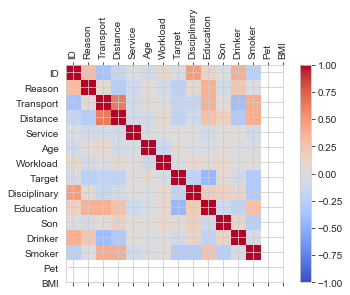

In [212]:
df = X
df_test = X_test_data
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [213]:
# Create correlation matrix 
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]
Xnew = df.drop(to_drop, axis=1)

print(Xnew.info())

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 665
Data columns (total 9 columns):
ID              665 non-null category
Reason          665 non-null category
Transport       665 non-null int64
Distance        665 non-null int64
Workload        665 non-null int64
Target          665 non-null int64
Disciplinary    665 non-null int64
Education       665 non-null int64
Smoker          665 non-null int64
dtypes: category(2), int64(7)
memory usage: 65.8+ KB
None


In [214]:
Xnew_test_data = df_test.drop(to_drop, axis=1)
# naive bayes with feature selection
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, y, test_size=test_size, random_state=random_state)

#############TRAIN DATA###############
gnb = GaussianNB()
model_nb_fs = gnb.fit(Xnew_train, ynew_train)
ynew_predict = model_nb_fs.predict(Xnew_test)

cm_nb_fs = confusion_matrix(ynew_test, ynew_predict)
accuracy_nb_fs = accuracy_score(ynew_test, ynew_predict)*100

scores_nb_fs = cross_val_score(model_nb_fs, Xnew, y, cv=cv)
predictions_nb_fs = cross_val_predict(model_nb_fs, Xnew, y, cv=cv)
accuracy_cv_nb_fs = metrics.accuracy_score(y, predictions_nb_fs)

#############TEST DATA###############
gnb = GaussianNB()
model = gnb.fit(Xnew, y)
ynew_predict_test = model.predict(Xnew_test_data)
cm_test_nb_fs = confusion_matrix(y_test_data, ynew_predict_test)
accuracy_test_nb_fs = accuracy_score(y_test_data, ynew_predict_test)*100


## SVM with RBF Kernel

In [216]:
# svm with rbf with feature selection
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, y, test_size=test_size, random_state=random_state)

#############TRAIN DATA###############
clf = SVC(kernel='rbf', gamma = gamma)
model_rbf_fs = clf.fit(Xnew_train, ynew_train)
ynew_predict = model_rbf_fs.predict(Xnew_test)

cm_rbf_fs = confusion_matrix(ynew_test, ynew_predict)
accuracy_rbf_fs = accuracy_score(ynew_test, ynew_predict)*100

scores_rbf_fs = cross_val_score(model_rbf_fs, Xnew, y, cv=cv)
predictions_rbf_fs = cross_val_predict(model_rbf_fs, Xnew, y, cv=cv)
accuracy_cv_rbf_fs = metrics.accuracy_score(y, predictions_rbf_fs)

#############TEST DATA###############
clf = SVC(kernel='rbf', gamma = gamma)
model = clf.fit(Xnew, y)
ynew_predict_test = model.predict(Xnew_test_data)
cm_test_rbf_fs = confusion_matrix(y_test_data, ynew_predict_test)
accuracy_test_rbf_fs = accuracy_score(y_test_data, ynew_predict_test)*100 

In [217]:
train_data_svm["Categories"] = train_data_svm["Categories"].astype("category")
test_data_svm["Categories"] = test_data_svm["Categories"].astype("category")
train_data_svm['Categories'].cat.reorder_categories(['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6'])
test_data_svm['Categories'].cat.reorder_categories(['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6'])
train_data_svm['Categories'] = train_data_svm.Categories.astype("category").cat.codes
test_data_svm['Categories'] = test_data_svm.Categories.astype("category").cat.codes


In [218]:
X_svm = train_data_svm.drop(['Categories'], axis = 1)
y_svm = train_data_svm["Categories"]

X_test_data_svm = test_data_svm.drop(['Categories'], axis = 1)
y_test_data_svm = test_data_svm["Categories"]

In [220]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_svm.values)
df_svm = pd.DataFrame(X_scaled, columns = X_svm.columns)
df_svm.head()

X_scaled_test = scaler.fit_transform(X_test_data_svm.values)
df_test_svm = pd.DataFrame(X_scaled_test, columns = X_test_data_svm.columns)
df_test_svm.head()


,ID,Reason,Transport,Distance,Service,Age,Workload,Target,Disciplinary,Education,Son,Drinker,Smoker,Pet,BMI
0,0.089146,1.135348,-0.381679,0.245111,-0.504748,-0.912741,-0.468282,-1.844175,-0.239046,1.358732,-1.149840,-0.849076,-0.348155,-0.575270,-1.428637
1,0.688857,0.233165,0.272518,0.245111,-0.504748,-1.180238,-0.468282,-1.844175,-0.239046,-0.735980,0.083322,-0.849076,-0.348155,0.350164,-0.318142
2,0.389002,-0.105153,0.414735,-0.564631,-0.729756,-0.645245,-0.468282,-1.844175,-0.239046,1.358732,-1.149840,-0.849076,-0.348155,-0.575270,-0.096043
3,0.089146,1.135348,-0.381679,0.245111,-0.504748,-0.912741,-0.468282,-1.844175,-0.239046,1.358732,-1.149840,-0.849076,-0.348155,-0.575270,-1.428637
4,-0.710468,1.248120,-0.723000,-0.888528,0.620293,-0.377748,-0.468282,-1.844175,-0.239046,-0.735980,1.316484,1.177751,-0.348155,-0.575270,-0.096043


In [221]:
# svm rbf after scaling
X_train, X_test, y_train, y_test = train_test_split(df_svm, y_svm, test_size=test_size, random_state=random_state)

#############TRAIN DATA###############
clf = SVC(kernel='rbf', gamma = gamma)
model_rbf = clf.fit(X_train, y_train)
y_predict = model_rbf.predict(X_test)

cm_rbf = confusion_matrix(y_test, y_predict)
accuracy_rbf = accuracy_score(y_test, y_predict)*100
scores_rbf = cross_val_score(model_rbf, df_svm, y_svm, cv=cv)
predictions_rbf = cross_val_predict(model_rbf,df_svm, y_svm, cv=cv)
accuracy_cv_rbf = metrics.accuracy_score(y_svm, predictions_rbf)


#############TEST DATA###############
clf = SVC(kernel='rbf', gamma = gamma)
model = clf.fit(df_svm, y_svm)
y_predict_test = model.predict(df_test_svm)

cm_test_rbf = confusion_matrix(y_test_data_svm, y_predict_test)
accuracy_test_rbf = accuracy_score(y_test_data_svm, y_predict_test)*100


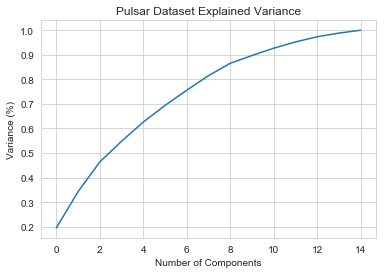

In [222]:
#Fitting the PCA algorithm with our Data
pca = PCA()
X_transform = pca.fit_transform(df_svm)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [223]:
# svm (rbf) with pca

pca = PCA(n_components=6)
X_transform = pca.fit_transform(df_svm)
print("Cumulative % of variance captured as # components increase = {}".format(np.cumsum(pca.explained_variance_ratio_)*100))

X_train, X_test, y_train, y_test = train_test_split(X_transform, y_svm, test_size=test_size, random_state=random_state)

#############TRAIN DATA###############
clf = SVC(kernel='rbf', gamma = gamma)
model_rbf_pca = clf.fit(X_train, y_train)
y_predict = model_rbf_pca.predict(X_test)

cm_rbf_pca = confusion_matrix(y_test, y_predict)
accuracy_rbf_pca = accuracy_score(y_test, y_predict)*100

scores_rbf_pca = cross_val_score(model_rbf_pca, X_transform, y_svm, cv=cv)
predictions_rbf_pca = cross_val_predict(model_rbf_pca, X_transform, y_svm, cv=cv)
accuracy_cv_rbf_pca = metrics.accuracy_score(y_svm, predictions_rbf_pca)

#############TEST DATA###############
clf = SVC(kernel='rbf', gamma = 0.02)
testdata_transformed = pca.transform(df_test_svm)

model = clf.fit(X_transform, y_svm)
y_predict_test = model.predict(testdata_transformed)

cm_test_rbf_pca = confusion_matrix(y_test_data_svm, y_predict_test)
accuracy_test_rbf_pca = accuracy_score(y_test_data_svm, y_predict_test)*100 


Cumulative % of variance captured as # components increase = [19.52346446 34.25968081 46.37034885 54.78045361 62.60595525 69.38607814]


In [225]:
## naive bayes with pca
pca = PCA(n_components=6)
X_transform = pca.fit_transform(df_svm)
print("Cumulative % of variance captured as # components increase = {}".format(np.cumsum(pca.explained_variance_ratio_)*100))

#############TRAIN DATA###############
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=test_size, random_state=random_state)

gnb = GaussianNB()
model_nb_pca = gnb.fit(X_train, y_train)
y_predict = model_nb_pca.predict(X_test)

cm_nb_pca = confusion_matrix(y_test, y_predict)
accuracy_nb_pca = accuracy_score(y_test, y_predict)*100

scores_nb_pca = cross_val_score(model_nb_pca, X_transform, y_svm, cv=cv)
predictions_nb_pca = cross_val_predict(model_nb_pca, X_transform, y_svm, cv=cv)
accuracy_cv_nb_pca = metrics.accuracy_score(y_svm, predictions_nb_pca)


#############TEST DATA###############
gnb = GaussianNB()
testdata_transformed = pca.transform(df_test_svm)
model = gnb.fit(X_transform, y_svm)
y_predict_test = model.predict(testdata_transformed)

cm_test_nb_pca = confusion_matrix(y_test_data, y_predict_test)
accuracy_test_nb_pca = accuracy_score(y_test_data, y_predict_test)*100



Cumulative % of variance captured as # components increase = [19.52346446 34.25968081 46.37034885 54.78045361 62.60595525 69.38607814]


In [226]:
training_accuracy = {}
training_accuracy["nb"] = accuracy_nb.round(2)
training_accuracy["nb_fs"] = accuracy_nb_fs.round(2)
training_accuracy["nb_pca"] = accuracy_nb_pca.round(2)

training_accuracy["rbf"] = accuracy_rbf.round(2)
training_accuracy["rbf_fs"] = accuracy_rbf_fs.round(2)
training_accuracy["rbf_pca"] = accuracy_rbf_pca.round(2)


test_accuracy = {}
test_accuracy["nb"] = accuracy_test_nb.round(2)
test_accuracy["nb_fs"] = accuracy_test_nb_fs.round(2)
test_accuracy["nb_pca"] = accuracy_test_nb_pca.round(2)

test_accuracy["rbf"] = accuracy_test_rbf.round(2)
test_accuracy["rbf_fs"] = accuracy_test_rbf_fs.round(2)
test_accuracy["rbf_pca"] = accuracy_test_rbf_pca.round(2)

cv_scores = {}
cv_scores["nb"] = accuracy_cv_nb.round(2)
cv_scores["nb_fs"] = accuracy_cv_nb_fs.round(2)
cv_scores["nb_pca"] = accuracy_cv_nb_pca.round(2)

cv_scores["rbf"] = accuracy_cv_rbf.round(2)
cv_scores["rbf_fs"] = accuracy_cv_rbf_fs.round(2)
cv_scores["rbf_pca"] = accuracy_cv_rbf_pca.round(2)



print("\n#################Training Data Accuracies are######################\n")
print("NB - {}%".format(training_accuracy['nb']))
print("NB with Correlation - {}%".format(training_accuracy['nb_fs']))
print("NB with PCA - {}%".format(training_accuracy['nb_pca']))

print("SVM(RBF) - {}%".format(training_accuracy['rbf']))
print("SVM(RBF) with Correlation - {}%".format(training_accuracy['rbf_fs']))
print("SVM(RBF) with PCA - {}%".format(training_accuracy['rbf_pca']))

print("\n#################Test Data Accuracies are######################\n")

print("NB - {}%".format(test_accuracy['nb']))
print("NB with Correlation - {}%".format(test_accuracy['nb_fs']))
print("NB with PCA - {}%".format(test_accuracy['nb_pca']))

print("SVM(RBF) - {}%".format(test_accuracy['rbf']))
print("SVM(RBF) with Correlation - {}%".format(test_accuracy['rbf_fs']))
print("SVM(RBF) with PCA - {}%".format(test_accuracy['rbf_pca']))



#################Training Data Accuracies are######################

NB - 38.81%
NB with Correlation - 46.27%
NB with PCA - 49.25%
SVM(RBF) - 58.21%
SVM(RBF) with Correlation - 56.72%
SVM(RBF) with PCA - 56.72%

#################Test Data Accuracies are######################

NB - 39.19%
NB with Correlation - 36.49%
NB with PCA - 39.19%
SVM(RBF) - 43.24%
SVM(RBF) with Correlation - 48.65%
SVM(RBF) with PCA - 50.0%


## CONTINOUS TARGET

### DECISION TREE (CONTINOUS) 

In [153]:
y_target = dataset_continuous['Absenteeism time in hours']
dataset_cont = dataset_continuous.drop(['Absenteeism time in hours'], axis=1)
#data_cont = pd.get_dummies(dataset_cont, ['Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker','Pet','followUp_req'])
dataset_cont = scale(dataset_cont)

X_train,X_test,y_train,y_test = train_test_split(dataset_cont, y_target, test_size=.10, random_state=151)

In [154]:
# Continuous data model

clf_cont = DecisionTreeRegressor(random_state = 1)
clf_cont = clf_cont.fit(X_train,y_train)

y_predict = clf_cont.predict(X_test)

err= mean_absolute_error(y_test,y_predict)

print('Mean Absolute error for decision tree regressor[validation set]:',err)


rmse = mean_squared_error( y_predict, y_test)**0.5

print('Root mean squared error for decision tree regressor[validation set]',rmse)

y_chck = mydata_test['Absenteeism time in hours']

y_predict_chck = clf_cont.predict(categorical_check)

err_test= mean_absolute_error(y_chck,y_predict_chck)

print('Mean Absolute error for decision tree regressor[test set]:',err_test)


rmse_test = mean_squared_error( y_predict_chck, y_chck)**0.5

print('Root mean squared error for decision tree regressor[test set]',rmse_test)

Mean Absolute error for decision tree regressor[validation set]: 5.139303482587065
Root mean squared error for decision tree regressor[validation set] 14.508160910386207
Mean Absolute error for decision tree regressor[test set]: 14.121621621621621
Root mean squared error for decision tree regressor[test set] 33.36347736105488


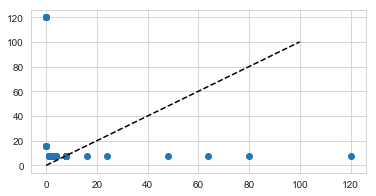

In [155]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 3))
plt.scatter(y_chck, y_predict_chck)
plt.plot([0, 100], [0, 100], '--k')

In [156]:
# Decision tree regression using cross validation


scoring = make_scorer(mean_squared_error)
reg_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10),'max_features': ['sqrt', 'log2', None]},
              scoring=scoring, cv=10, refit=True)

reg_cv.fit(X_train, y_train)

print(reg_cv.best_params_)
mean_err =mean_absolute_error(y_test, reg_cv.best_estimator_.predict(X_test))

print('Mean Absolute error of decision tree regressor [validation set]',mean_err)

rmse = mean_squared_error(y_test, reg_cv.best_estimator_.predict(X_test))**0.5

print('root mean square error of decision tree regressor [validation set]',rmse)


err_test_cv= mean_absolute_error(y_chck,reg_cv.best_estimator_.predict(categorical_check))

print('Mean Absolute error for decision tree regressor[test set]:',err_test_cv)


rmse_test_cv = mean_squared_error( y_predict_chck, reg_cv.best_estimator_.predict(categorical_check))**0.5

print('Root mean squared error for decision tree regressor[test set]',rmse_test_cv)

{'max_features': None, 'min_samples_split': 2}
Mean Absolute error of decision tree regressor [validation set] 5.310945273631841
root mean square error of decision tree regressor [validation set] 15.366838258935546
Mean Absolute error for decision tree regressor[test set]: 12.283783783783784
Root mean squared error for decision tree regressor[test set] 9.43827744247228


### SVM (Continous)

In [157]:
#Seperate explanatory and target variable
X = mydata_con.drop(['Absenteeism time in hours'], axis = 1)
y = mydata_con['Absenteeism time in hours']


In [158]:
# Scale the data and apply pca 
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.7975154295083902

In [159]:
#make a pc dataframe
p_df = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4',
                                                                  'pc5','pc6','pc7','pc8','pc9','pc10'])
#SVM - linear model
X_train, X_test, y_train, y_test = train_test_split(p_df, y, test_size=0.25, random_state=1234)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

48.795180722891565

In [160]:
#Factor Analysis - 

dat = X
data_normal = scale(dat)
fa = FactorAnalysis(n_components = 10)
fa = fa.fit(data_normal)
feature_names = dat.columns
factor_names = ['Factor'+str(x) for x in range(1,11)]
pd.DataFrame(np.transpose(fa.components_), index=feature_names ,
columns=factor_names)


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
ID,0.102813,0.429230,0.780921,0.157371,-0.028569,0.073078,-0.271484,-0.105335,0.030824,0.041476
Reason for absence,-0.992306,0.067984,0.010629,0.006723,-0.009947,-0.005887,-0.000572,0.006193,-0.005290,-0.003275
Month of absence,0.117647,-0.065573,-0.070310,0.582774,-0.724258,0.003443,0.100982,0.031134,-0.044876,0.023703
Day of the week,-0.095482,0.086620,-0.059172,-0.028489,-0.058892,0.146441,-0.080955,-0.031580,-0.029606,-0.037358
Seasons,0.144548,-0.002751,0.039838,0.303761,-0.312655,0.024585,0.017222,0.009357,-0.305646,0.000051
Transportation expense,0.149064,0.138689,-0.470940,0.355642,0.108833,-0.052288,-0.248659,0.028881,0.056714,-0.417978
Distance from Residence to Work,-0.184124,-0.163020,-0.672663,0.043640,0.077740,0.223216,-0.251394,-0.187724,-0.030193,0.287605
Service time,-0.110748,-0.582484,0.013978,-0.425316,-0.189957,0.406862,-0.009035,0.250572,-0.087112,0.165893
Age,0.015677,-0.516117,0.310859,-0.202607,-0.162965,0.410909,-0.184967,0.416944,0.073049,-0.109283
Work load Average/day,0.159750,0.084186,0.105881,-0.145351,0.129714,-0.128633,-0.186210,0.021482,-0.750625,-0.108579


In [161]:
# Cross Validation - log reg
seed = 7
kfold = KFold(n_splits=5, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, p_df, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 40.954% (6.153%)


In [162]:
# Cross Validation - linear reg
#On p_df - Accuracy: 14.096% (4.772%)
#On unscaled data Accuracy: 12.186% (8.636%)
seed = 7
kfold = KFold(n_splits=5, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 12.046% (10.502%)


In [163]:
# Cross Validation - SVM - linear
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
model = svm.SVC(kernel='linear')

In [164]:
#PCA Data frame - 44.7%
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 41.566% (3.816%)


In [165]:
 # Data Scaled using scale() instead of standard scaler - without PCA
results2 = cross_val_score(model, data_normal, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

Accuracy: 41.411% (4.372%)


In [166]:
# Cross Validation - SVM - rbf
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
model = svm.SVC(kernel='rbf', gamma = 0.1)

#PCA Data frame 
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

# Data Scaled using scale() instead of standard scaler - without PCA
results2 = cross_val_score(model, data_normal, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

Accuracy: 45.481% (3.685%)
Accuracy: 44.727% (4.452%)


In [167]:
# Cross Validation - SVM - poly
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

# Data Scaled using scale() instead of standard scaler - without PCA
results2 = cross_val_score(model, data_normal, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

Accuracy: 43.230% (3.960%)
Accuracy: 44.875% (3.614%)


In [168]:
# Cross Validation - SVM - poly
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
# n_splits 3-44, 7-43, 10-46, but std dev was high, so retaining n splits = 5
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 = cross_val_score(model, p_df, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))


Accuracy: 43.230% (3.960%)


In [169]:
# Cross Validation - SVM - poly - on unscaled data with no pca - no improvement
seed = 1234
kfold = KFold(n_splits=5, random_state=seed)
# n_splits 3-44, 7-43, 10-46, but std dev was high, so retaining n splits = 5
model = svm.SVC(kernel='poly', degree = 1)

#PCA Data frame 
results1 = cross_val_score(model, X, y, cv=kfold)  
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 40.656% (3.975%)
